In [1]:
import pandas as pd

df = pd.read_csv('/Users/kamil/Desktop/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [40]:
df.drop(columns=['aspiration','fuel-type','num-of-doors', 'drive-wheels','num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg'])


,symboling,normalized-losses,make,length,width,height,price
0,3,?,alfa-romero,168.8,64.1,48.8,13495
1,3,?,alfa-romero,168.8,64.1,48.8,16500
2,1,?,alfa-romero,171.2,65.5,52.4,16500
3,2,164,audi,176.6,66.2,54.3,13950
4,2,164,audi,176.6,66.4,54.3,17450
...,...,...,...,...,...,...,...
200,-1,95,volvo,188.8,68.9,55.5,16845
201,-1,95,volvo,188.8,68.8,55.5,19045
202,-1,95,volvo,188.8,68.9,55.5,21485
203,-1,95,volvo,188.8,68.9,55.5,22470


In [41]:
df.shape

(205, 26)

In [28]:
df.corr()
#for excample, here we can see high correlation ( corr> |0,7|)  with : 1. wheel-base length 2. wheel-base width  3. wheel-base and curb-weight 4. length width. 
#5. length curb-weight 6. ~~length engine-size 7. ~~length city mpg // etc 


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


In [9]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [30]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

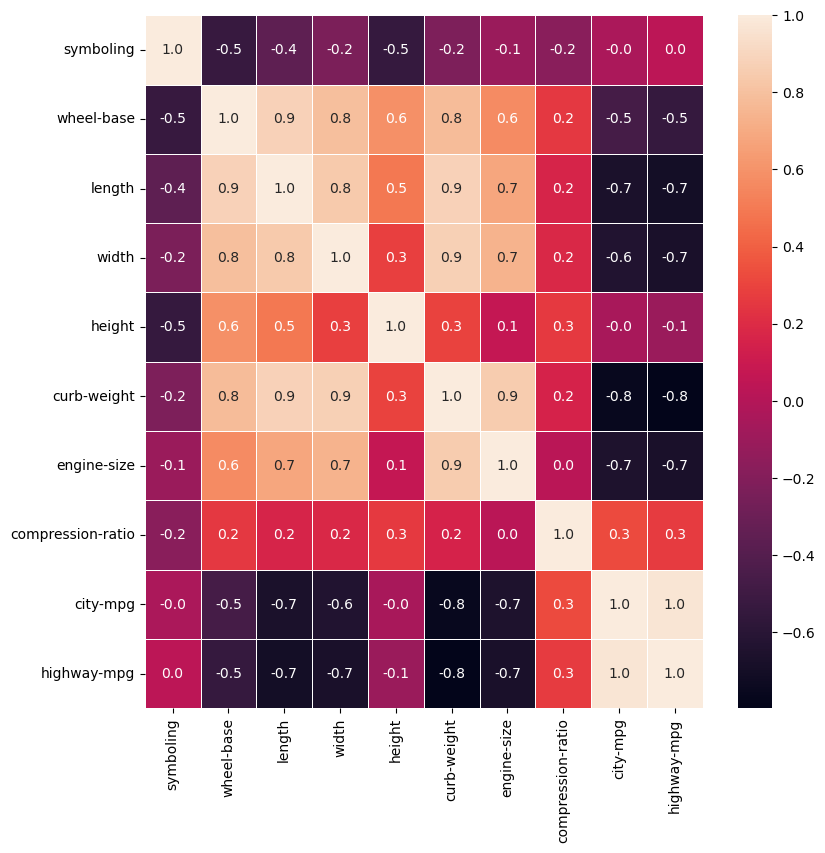

In [31]:
#correlation map, but first I need import libraries
import seaborn as sns
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#this chart show us better correlations between columns An extremely negative deviation means that the higher the value of one variable,
#the lower the value of the other, while an extremely positive result means that both values will increase or decrease synchronously. 
#0 indicates a complete lack of relationship between the variables.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [76]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [47]:
import numpy as np
df['price'] = df['price'].replace('?', np.nan).fillna(0).astype('int64')


In [48]:
df.price.head(40)

0     13495
1     16500
2     16500
3     13950
4     17450
5     15250
6     17710
7     18920
8     23875
9         0
10    16430
11    16925
12    20970
13    21105
14    24565
15    30760
16    41315
17    36880
18     5151
19     6295
20     6575
21     5572
22     6377
23     7957
24     6229
25     6692
26     7609
27     8558
28     8921
29    12964
30     6479
31     6855
32     5399
33     6529
34     7129
35     7295
36     7295
37     7895
38     9095
39     8845
Name: price, dtype: int64

In [49]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Text(0.5, 1.0, 'Występowanie marek samochodów w naszym badaniu')

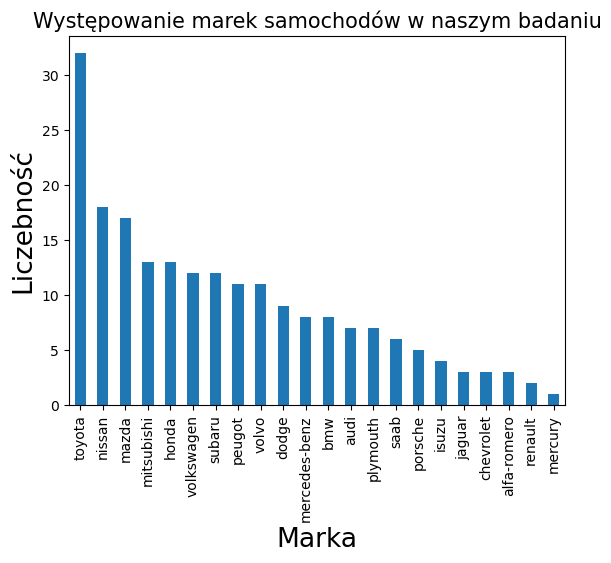

In [108]:
hist = df['make'].value_counts()
std_dev = df['make'].value_counts().std()
hist.plot(kind='bar')
plt.xlabel('Marka', fontsize = 19)
plt.ylabel ('Liczebność', fontsize = 19)
plt.title('Występowanie marek samochodów w naszym badaniu', fontsize = 15)


In [107]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [83]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [84]:
df['normalized-losses'].value_counts() # this commend can also tell us how often sign "?" occurs 

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [85]:
df['normalized-losses'] = df['normalized-losses'].replace('?', np.nan).fillna(0).astype('int64')

In [86]:
df['normalized-losses'].value_counts()

0      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

Text(0, 0.5, 'fuel-type')

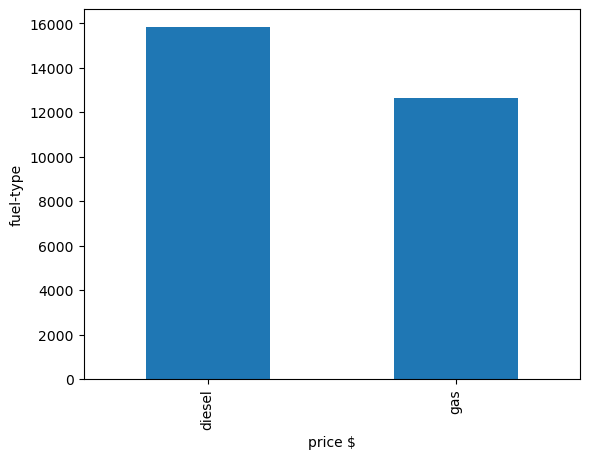

In [91]:
df.groupby('fuel-type')['price'].mean().plot(kind='bar')
plt.xlabel('fuel-type')
plt.ylabel('price $')

Text(0, 0.5, 'price $')

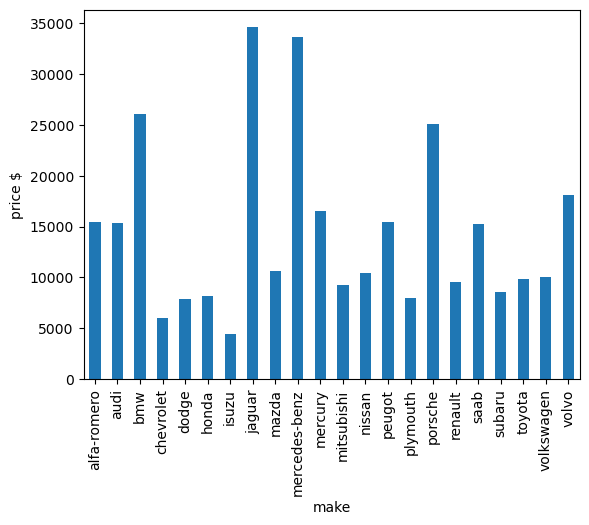

In [92]:
df.groupby('make')['price'].mean().plot(kind='bar')
plt.xlabel('make')
plt.ylabel('price $')

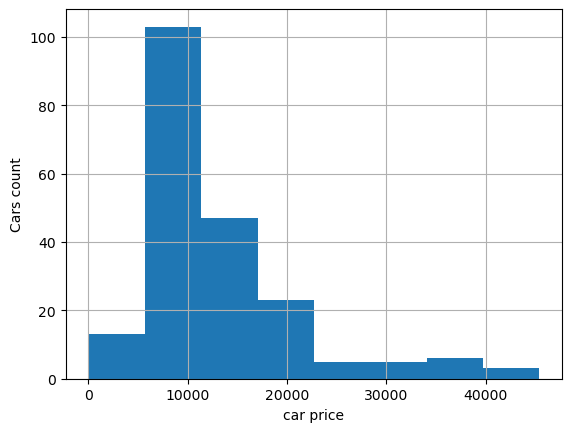

In [116]:
df['price'].hist(bins=8)
plt.ylabel("Cars count")
plt.xlabel('car price')
plt.show()
#positive skewed, x>Me>D

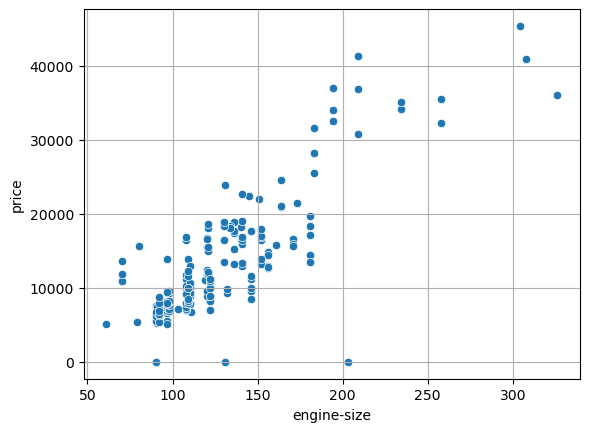

In [133]:
sns.scatterplot(data=df,x="engine-size",y="price")
plt.grid(True)

In [121]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Text(0, 0.5, 'price $')

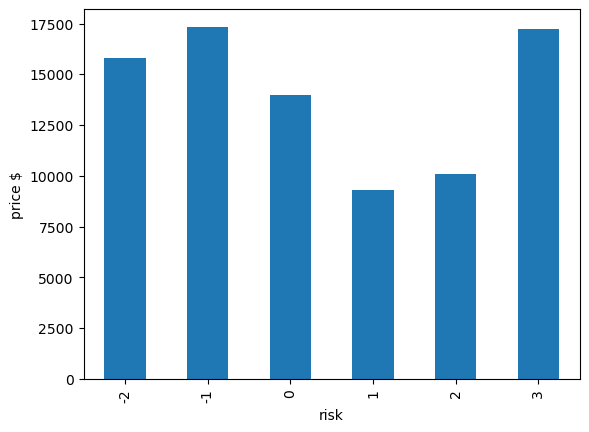

In [132]:
df.groupby('symboling')['price'].mean().plot(kind='bar')

plt.xlabel('risk')
plt.ylabel('price $')

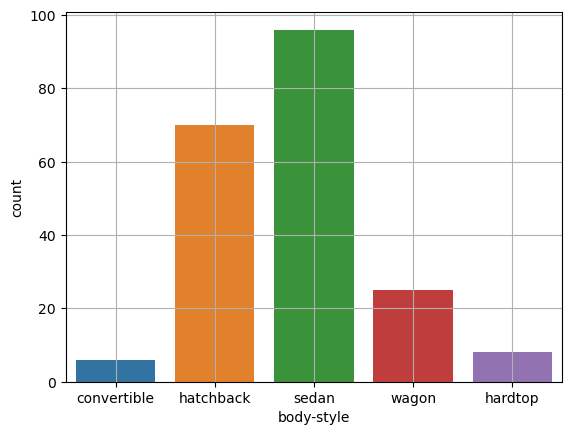

In [130]:
sns.countplot(data=df,x="body-style")
plt.grid(True)
plt.show()